<a href="https://colab.research.google.com/github/seonghaiiiii/aipython/blob/main/240115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

#키와 몸무게

In [9]:
X = [[164], [179], [162], [170]] #키 데이터
y = [53, 63, 55, 59] #몸무게 데이터
regr.fit(X, y)

LinearRegression()

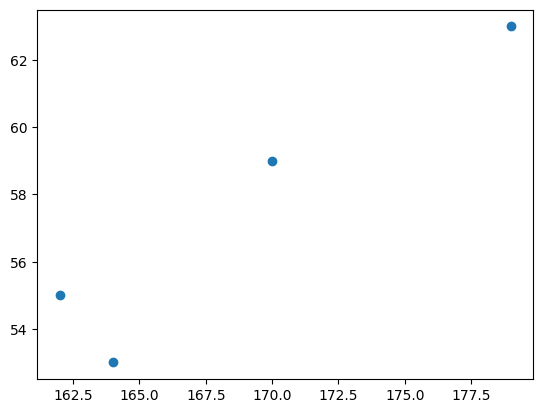

In [10]:
plt.scatter(X, y)

In [12]:
y_pred = regr.predict(X)

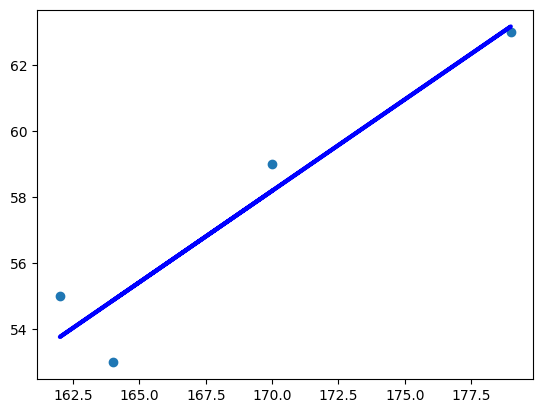

In [15]:
plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.scatter(X, y)
plt.show()

In [20]:
input_data = [[180], [185]] #새로 예측해 볼 데이터
result = regr.predict(input_data)
print(result)

[63.71244635 66.47353362]


#재배 면적과 수확량 (ppt 없음)

In [21]:
X = [[2.1],[10],[3],[1],[3.5],[5],[8]]
y = [64.9,292.6,85.9,30.92,110.5,163.4,163.4]
regr.fit(X, y)

LinearRegression()

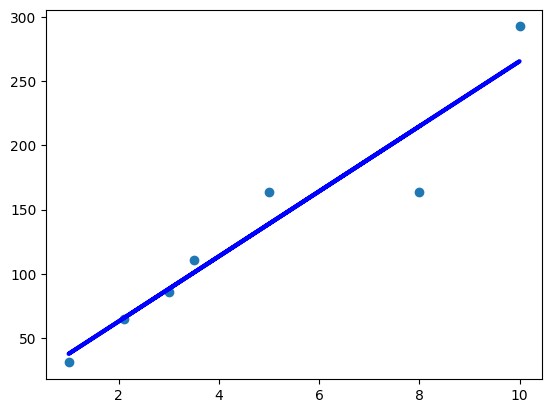

In [22]:
plt.scatter(X, y)
y_pred = regr.predict(X)
plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.show()

In [23]:
input_data = [[7], [12]] #새로 예측해 볼 데이터
result = regr.predict(input_data)
print(result)

[189.55106566 316.14785212]


In [28]:
x = np.array([[2.1],[10],[3],[1],[3.5],[5],[8]], dtype=float)
y = np.array([64.9,292.6,85.9,30.92,110.5,163.4,163.4], dtype=float)

regr.fit(x,y)
pred = regr.predict([[7],[12]])
print(pred)

[189.55106566 316.14785212]


#부모 키, 자녀 키 예측

In [31]:
from sklearn import tree

parents_height = [[180,165],[175,160],[180,172],[165,160],[171,152]]
child_height = [3,2,2,1,1]

dt_model = tree.DecisionTreeClassifier()
dt_model.fit(parents_height, child_height)
dt_pred=dt_model.predict([[175,153]])
dt_pred

array([2])

#캐글 시험점수예측

In [33]:
df = pd.read_csv('/content/drive/MyDrive/AI 파이썬 기초/data/Student_Marks.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [34]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [36]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [37]:
df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


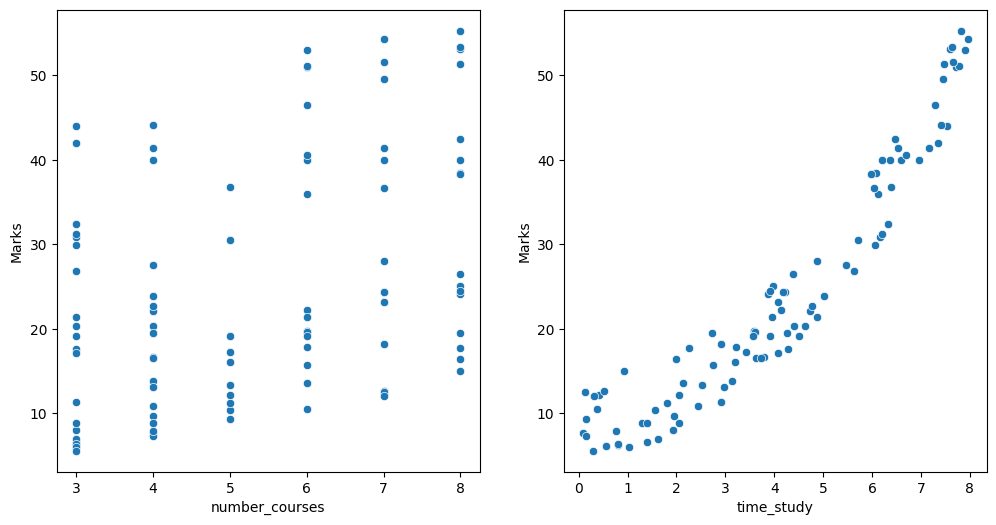

In [38]:
fig, ax=plt.subplots(ncols=2, figsize=(12,6))
sns.scatterplot(data=df, x='number_courses',y='Marks', ax=ax[0])
sns.scatterplot(data=df, x='time_study',y='Marks', ax=ax[1])
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
x=df.drop('Marks',axis=1)
y=df['Marks']
X_train, X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [42]:
lr_model.fit(X_train,Y_train)

LinearRegression()

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [44]:
lr_pred=lr_model.predict(X_test)

In [47]:
r2_score(lr_pred, Y_test)

0.9219617777759717

In [46]:
mean_squared_error(lr_pred,Y_test)

14.200726136374552

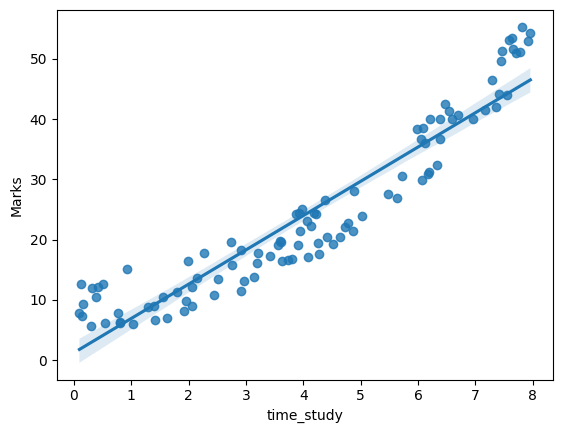

In [49]:
sns.regplot(x=df['time_study'],y=df['Marks'])
plt.show()